# Chapter 5: Resampling Methods
- **Chapter 5 from the book [An Introduction to Statistical Learning](https://www.statlearning.com/).**
- **By Gareth James, Daniela Witten, Trevor Hastie and Rob Tibshirani.**
- **Pages from $198$ to $201$**
- By [**$\text{Mosta Ashour}$**](https://www.linkedin.com/in/mosta-ashour/)


**Exercises:**
- **[5.](#5) [(a)](#5a) [(b)](#5b) [(c)](#5c) [(d)](#5d)**
- **[6.](#6) [(a)](#6a) [(b)](#6b) [(c)](#6c) [(d)](#6d)**
- **[7.](#7) [(a)](#7a) [(b)](#7b) [(c)](#7c) [(d)](#7d)**
- **[8.](#8) [(a)](#8a) [(b)](#8b) [(c)](#8c) [(d)](#8d) [(e)](#8e) [(f)](#8f)**
- **[9.](#9) [(a)](#9a) [(b)](#9b) [(c)](#9c) [(d)](#9d) [(e)](#9e) [(f)](#9f) [(g)](#9g) [(h)](#9h)**
 
 
# <span style="font-family:cursive;color:#0071bb;"> 5.4 Exercises </span>
## <span style="font-family:cursive;color:#0071bb;"> Applied </span>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scripts.ch4 import *

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from IPython.display import display
from sklearn import datasets
from scipy import stats

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [2]:
def confusion_table(confusion_mtx):
    """Renders a nice confusion table with labels"""
    confusion_df = pd.DataFrame({'y_pred=0': np.append(confusion_mtx[:, 0], confusion_mtx.sum(axis=0)[0]),
                                 'y_pred=1': np.append(confusion_mtx[:, 1], confusion_mtx.sum(axis=0)[1]),
                                 'Total': np.append(confusion_mtx.sum(axis=1), ''),
                                 '': ['y=0', 'y=1', 'Total']}).set_index('')
    return confusion_df

def total_error_rate(confusion_mtx):
    """Derive total error rate from confusion matrix"""
    return 1 - np.trace(confusion_mtx) / np.sum(confusion_mtx)

<a id='5'></a>
### $5.$ In Chapter $4$, we used logistic regression to predict the probability of $\color{brown}{\text{default}}$ using $\color{brown}{\text{income}}$ and $\color{brown}{\text{balance}}$ on the $\color{brown}{\text{Default}}$ data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.

In [3]:
# Read the Default dataset
default_df = pd.read_csv('datasets/Default.csv').drop('Unnamed: 0', axis=1)

# Get all dummies in the df
default_df = pd.get_dummies(default_df, dtype=np.float64, drop_first=True)
default_df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0.0,0.0
1,817.180407,12106.134700,0.0,1.0
2,1073.549164,31767.138947,0.0,0.0
3,529.250605,35704.493935,0.0,0.0
4,785.655883,38463.495879,0.0,0.0


<a id='5a'></a>
**$(a)$ Fit a logistic regression model that uses $\color{brown}{\text{income}}$ and $\color{brown}{\text{balance}}$ to predict $\color{brown}{\text{default}}$.**

In [4]:
# Logistic regresssion
X = default_df[['income', 'balance']]
y = default_df.default_Yes
log_r = LogisticRegression().fit(X, y)

<a id='5b'></a>
**$(b)$ Using the validation set approach, estimate the test error of this model. In order to do this, you must perform the following steps:**

- **$i.$ Split the sample set into a training set and a validation set.**

In [5]:
# Splitting the sample set
X_train, X_test, y_train, y_test = train_test_split(default_df[['income', 'balance']],
                                                    default_df.default_Yes,
                                                    test_size=0.5,
                                                    random_state=0)

- **$ii.$ Fit a multiple logistic regression model using only the training observations.**

In [6]:
# Model
log_r = LogisticRegression().fit(X_train, y_train)

- **$iii.$ Obtain a prediction of default status for each individual in the validation set by computing the posterior probability of default for that individual, and classifying the individual to the default category if the posterior probability is greater than 0.5.**

In [7]:
# Predict
y_pred = log_r.predict(X_test)

- **$iv.$ Compute the validation set error, which is the fraction of the observations in the validation set that are misclassified.**

In [8]:
val_err = 1 - sum(sum([y_test == y_pred]))/len(y_test)
print("Validation error rate =", round(val_err*100, 4),"%")

Validation error rate = 2.9 %


<a id='5c'></a>
**$(c)$ Repeat the process in $(b)$ three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.**

With random_state = 1
Validation error rate = 3.22 %


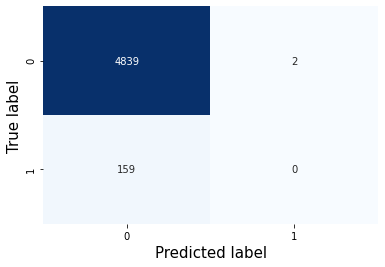

---------------------------------------
With random_state = 2
Validation error rate = 3.12 %


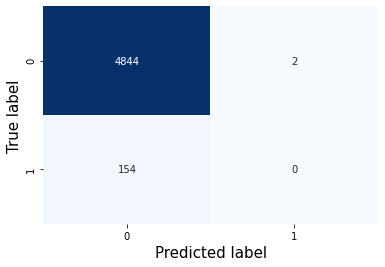

---------------------------------------
With random_state = 3
Validation error rate = 3.4 %


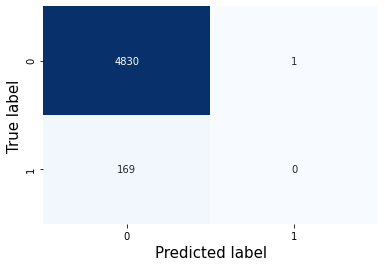

---------------------------------------


In [9]:
for i in range(1,4):
    # Splitting the sample set
    X_train, X_test, y_train, y_test = train_test_split(default_df[['income', 'balance']],
                                                        default_df.default_Yes,
                                                        test_size=0.5,
                                                        random_state=i)
    
    # Logistic regresssion
    log_r = LogisticRegression().fit(X_train, y_train)
    
    # Predict
    y_pred = log_r.predict(X_test)

    val_err = 1 - sum(sum([y_test == y_pred]))/len(y_test)
    print(f"With random_state = {i}")
    print("Validation error rate =", round(val_err*100, 4),"%")
    
    # confusion matrix
    confusion_mtx = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(confusion_mtx)
    
    # overall stats
#    log_stats = conf_mtx_stats(confusion_matrix(y_test, y_pred))
#    display(log_stats)
    print("---------------------------------------")

>- **Comment:**
>  - it seems to average around 3.16% test error rate.
>  - As we face **unbalanced problem** in the **Default** dataset, the model tends to predict almost all as **Not Defaulted**.

<a id='5d'></a>
**$(d)$ Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.**

With random_state = 1
Validation error rate = 3.22 %


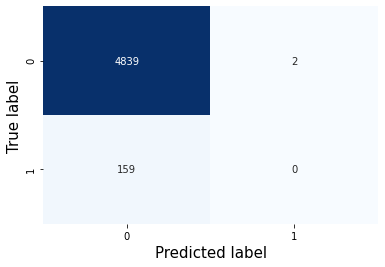

Accuracy                                 0.9678
Total_Error_Rate                         0.0322
True_Negative_Rate (Specificity)         0.9996
True_Positive_Rate (Recall)              0.0000
False_Negative_Rate                      1.0000
False_Positive_Rate                      0.0004
negative_Predictive_Value                0.9682
Positive_Predictive_Value (Precision)    0.0000
Prior_Error_Rate                         0.9682
dtype: float64

---------------------------------------
With random_state = 2
Validation error rate = 3.2 %


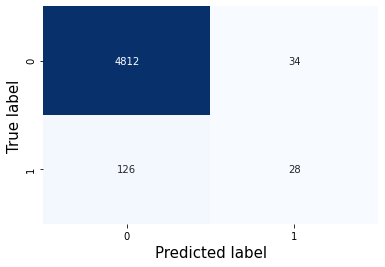

Accuracy                                 0.9680
Total_Error_Rate                         0.0320
True_Negative_Rate (Specificity)         0.9930
True_Positive_Rate (Recall)              0.1818
False_Negative_Rate                      0.8182
False_Positive_Rate                      0.0070
negative_Predictive_Value                0.9745
Positive_Predictive_Value (Precision)    0.4516
Prior_Error_Rate                         0.9692
dtype: float64

---------------------------------------
With random_state = 3
Validation error rate = 3.4 %


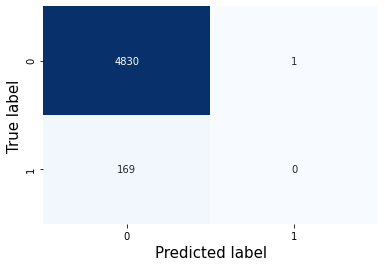

Accuracy                                 0.9660
Total_Error_Rate                         0.0340
True_Negative_Rate (Specificity)         0.9998
True_Positive_Rate (Recall)              0.0000
False_Negative_Rate                      1.0000
False_Positive_Rate                      0.0002
negative_Predictive_Value                0.9662
Positive_Predictive_Value (Precision)    0.0000
Prior_Error_Rate                         0.9662
dtype: float64

---------------------------------------
With random_state = 4
Validation error rate = 2.46 %


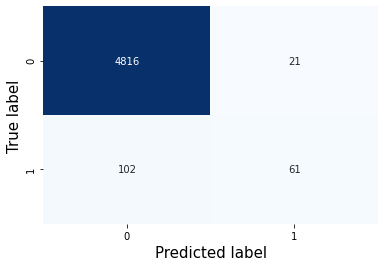

Accuracy                                 0.9754
Total_Error_Rate                         0.0246
True_Negative_Rate (Specificity)         0.9957
True_Positive_Rate (Recall)              0.3742
False_Negative_Rate                      0.6258
False_Positive_Rate                      0.0043
negative_Predictive_Value                0.9793
Positive_Predictive_Value (Precision)    0.7439
Prior_Error_Rate                         0.9674
dtype: float64

---------------------------------------


In [10]:
for i in range(1,5):
    # Splitting the sample set
    X_train, X_test, y_train, y_test = train_test_split(default_df[['income', 'balance', 'student_Yes']],
                                                        default_df.default_Yes,
                                                        test_size=0.5,
                                                        random_state=i)
    
    # Logistic regresssion
    log_r = LogisticRegression().fit(X_train, y_train)
    
    # Predict
    y_pred = log_r.predict(X_test)

    val_err = 1 - sum(sum([y_test == y_pred]))/len(y_test)
    print(f"With random_state = {i}")
    print("Validation error rate =", round(val_err*100, 4),"%")
    
    # confusion matrix
    confusion_mtx = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(confusion_mtx)
    
    # overall stats
    log_stats = conf_mtx_stats(confusion_matrix(y_test, y_pred))
    display(log_stats)
    print("---------------------------------------")

>- **Comment:**
>  - Now it seems to average around 3.07% test error rate, and that is a slightly reduction in the test error rate. 
>  - And we can see that including a dummy variable for student leads to an increasement in the Recall! which is the True Positive Rate. Thus, we can say including a dummy variable for student fixed a little in the **unbalanced problem**.

<a id='6'></a>
### $6.$ We continue to consider the use of a logistic regression model to predict the probability of $\color{brown}{\text{default}}$ using $\color{brown}{\text{income}}$ and $\color{brown}{\text{balance}}$ on the $\color{brown}{\text{Default}}$ data set. In particular, we will now compute estimates for the standard errors of the $\color{brown}{\text{income}}$ and $\color{brown}{\text{balance}}$ logistic regression coefficients in two different ways: $(1)$ using the bootstrap, and $(2)$ using the standard formula for computing the standard errors in the $\color{brown}{\text{glm()}}$ function. Do not forget to set a random seed before beginning your analysis.

<a id='6a'></a>
**$(a)$ Using the $\color{brown}{\text{summary()}}$ and $\color{brown}{\text{glm()}}$ functions, determine the estimated standard errors for the coefficients associated with income and balance in a multiple logistic regression model that uses both predictors.**

In [11]:
# Model
f = 'default_Yes ~ income + balance'
log_r = smf.logit(formula=f, data=default_df).fit()

# Summary
display(log_r.summary())

statsmodels_est = pd.DataFrame({'coef_sm': log_r.params, 'SE_sm': log_r.bse})
display(statsmodels_est)

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            default_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Sat, 24 Jul 2021   Pseudo R-squ.:                  0.4594
Time:                        20:49:53   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
balance        0.0056      0.000     24.835      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

,coef_sm,SE_sm
Intercept,-11.540468,0.434772
income,0.000021,0.000005
balance,0.005647,0.000227


<a id='6b'></a>
**$(b)$ Write a function, $\color{brown}{\text{boot.fn()}}$, that takes as input the $\color{brown}{\text{Default}}$ data set as well as an index of the observations, and that outputs the coefficient estimates for $\color{brown}{\text{income}}$ and $\color{brown}{\text{balance}}$ in the multiple logistic regression model.**

In [12]:
def boot_fn(df):
    # Model
    f = 'default_Yes ~ income + balance'
    model_logit = smf.logit(formula=f, data=df).fit();
    return model_logit.params

<a id='6c'></a>
**$(c)$ Use the $\color{brown}{\text{boot()}}$ function together with your $\color{brown}{\text{boot.fn() }}$function to estimate the standard errors of the logistic regression coefficients for $\color{brown}{\text{income}}$ and $\color{brown}{\text{balance}}$.**

In [13]:
coef_preds = []

for i in range(2000):
    # bootstrap sample
    sample = default_df.sample(len(default_df), replace=True)
    coef_preds.append(boot_fn(sample))

Optimization terminated successfully.
         Current function value: 0.083431
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.074267
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.074427
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.079798
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.075683
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.080074
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.075040
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078594
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.081215
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.079909
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.084173
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.077917
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078536
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.089190
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.083159
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.087240
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.082192
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.082656
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.081443
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.076593
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.077703
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.073410
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.080927
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.079622
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078750
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.079855
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.071029
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.083818
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.076424
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.071863
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.080507
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.082328
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.080558
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.081791
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.075967
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.083037
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.078100
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.073415
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.075265
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.077605
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.076471
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.082476
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.081883
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.084172
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.080523
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.076038
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.080442
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.081609
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.076506
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078036
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.076678
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.077711
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.074603
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.081804
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.077887
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.074426
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.075532
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.081782
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.076594
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078114
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.086716
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.081251
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.080715
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.081584
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.083228
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.083968
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.083846
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.075895
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.076413
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.084765
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.076638
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.071630
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.081274
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078989
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.077804
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.082411
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.074272
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.076903
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.081531
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.077290
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.071629
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.074679
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.083226
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.082003
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.081366
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.077538
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.075667
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.076514
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.074434
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.081311
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.075342
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.077712
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.073465
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.071410
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.077469
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.080071
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.080606
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.080908
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.080021
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.081558
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.076485
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.071010
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.075144
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.079533
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.082967
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.086007
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078033
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.080905
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.077226
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.076395
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.077673
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.080135
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.079979
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.082922
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.073238
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.077155
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.074275
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.078190
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.070846
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.076523
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.079044
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.082301
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.085970
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.075244
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.075585
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.072627
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.070566
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078870
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.079899
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.076776
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078467
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.085633
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.082884
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.075188
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078323
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.073625
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.084699
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.074070
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.079371
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.082314
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.085724
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.080315
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.088916
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.082616
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.084093
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.075649
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078731
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.080054
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.081802
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.077261
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.079031
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.073870
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.079357
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.075468
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.076324
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078720
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.075939
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078424
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.077019
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.080978
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.089479
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.086623
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.077930
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.079417
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.076603
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.076058
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.073252
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078763
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.085292
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.088515
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.077487
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.082350
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.081466
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.075005
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.073971
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.075489
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.083477
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.081764
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078863
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.083213
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.077139
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.085163
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078585
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.082643
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.075328
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.082384
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.081090
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.081587
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.075260
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.074187
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.072938
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078694
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.083057
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.089473
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.077137
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.073794
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078296
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.076690
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.086703
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.073859
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.080731
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.074757
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.072933
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.083473
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.076952
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.071615
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.072120
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.079112
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.080905
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.079508
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.073931
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.077200
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.076048
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.077775
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.075781
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.081431
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

Optimization terminated successfully.
         Current function value: 0.071677
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.071416
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.076170
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.081125
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.078937
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.090220
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.083905
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.077677
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.079161
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.

In [14]:
coef_pred     = np.mean(coef_preds, axis=0)
standard_errs = np.std(coef_preds, axis=0)

bootstrap_est = pd.DataFrame({'coef_boot': coef_pred,
                              'SE_boot': standard_errs})
display(bootstrap_est)

,coef_boot,SE_boot
0,-11.579274,0.441608
1,0.000021,0.000005
2,0.005667,0.000238


<a id='6d'></a>
**$(d)$ Comment on the estimated standard errors obtained using the $\color{brown}{\text{glm()}}$ function and using your bootstrap function.**

In [15]:
pd.concat([statsmodels_est, bootstrap_est.set_index(statsmodels_est.index)], axis=1)

,coef_sm,SE_sm,coef_boot,SE_boot
Intercept,-11.540468,0.434772,-11.579274,0.441608
income,0.000021,0.000005,0.000021,0.000005
balance,0.005647,0.000227,0.005667,0.000238


>- We can see that the standard error estimates for **income** are equal to 6 decimal places. and the estimates for **balance** are equal to 4 decimal places. This could be an indication that the assumptions of the logistic $SE$ estimates are well-satisfied.
>- We can see that the standard errors estimated by the statsmodels approximately equal to the estimates obtained by bootstrap, and with just 10 bootstrap samples we got a slightly more significant than with 2,000 bootstrap samples!

<a id='7'></a>
### $7.$ In Sections $5.3.2$ and $5.3.3$, we saw that the $\color{brown}{\text{cv.glm()}}$ function can be used in order to compute the LOOCV test error estimate. Alternatively, one could compute those quantities using just the $\color{brown}{\text{glm()}}$ and $\color{brown}{\text{predict.glm()}}$ functions, and a for loop. You will now take this approach in order to compute the LOOCV error for a simple logistic regression model on the $\color{brown}{\text{Weekly}}$ data set. Recall that in the context of classification problems, the LOOCV error is given in $(5.4)$.

In [16]:
# Read the Weekly dataset
weekly_df = pd.read_csv('datasets/Weekly.csv')

# Get all dummies in the df
weekly_df = pd.get_dummies(weekly_df, drop_first=True)
weekly_df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction_Up
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,0
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,0
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,1
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,1
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,1


<a id='7a'></a>
**$(a)$ Fit a logistic regression model that predicts $\color{brown}{\text{Direction}}$ using $\color{brown}{\text{Lag1}}$ and $\color{brown}{\text{Lag2}}$.**

test error rate = 43.6697 %


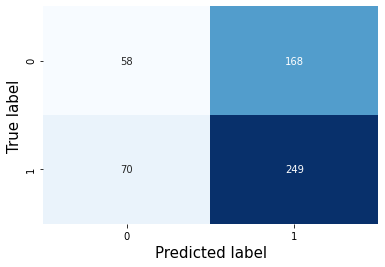

Accuracy                                 0.5633
Total_Error_Rate                         0.4367
True_Negative_Rate (Specificity)         0.2566
True_Positive_Rate (Recall)              0.7806
False_Negative_Rate                      0.2194
False_Positive_Rate                      0.7434
negative_Predictive_Value                0.4531
Positive_Predictive_Value (Precision)    0.5971
Prior_Error_Rate                         0.4147
dtype: float64

In [17]:
# Splitting the sample set
X_train, X_test, y_train, y_test = train_test_split(weekly_df[['Lag1', 'Lag2']],
                                                    weekly_df.Direction_Up,
                                                    test_size=0.5,
                                                    random_state=42)

# Logistic regresssion
log_r = LogisticRegression().fit(X_train, y_train)

# Predict
y_pred = log_r.predict(X_test)

test_err = 1 - sum(sum([y_test == y_pred]))/len(y_test)
print("test error rate =", round(test_err*100, 4),"%")

# confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion_mtx)

# overall stats
log_stats = conf_mtx_stats(confusion_matrix(y_test, y_pred))
display(log_stats)

<a id='7b'></a>
**$(b)$ Fit a logistic regression model that predicts $\color{brown}{\text{Direction}}$ using $\color{brown}{\text{Lag1}}$ and $\color{brown}{\text{Lag2}}$ using all but the first observation.**

In [18]:
# Model
X = weekly_df[['Lag1', 'Lag2']].iloc[1:]
y = weekly_df.Direction_Up.iloc[1:]
log_r = LogisticRegression().fit(X, y)

<a id='7c'></a>
**$(c)$ Use the model from $(b)$ to predict the direction of the first observation. You can do this by predicting that the first observation will go up if $P\color{brown}{\text{(Direction="Up"|Lag1, Lag2)}} > 0.5$. Was this observation correctly classified?**

test error rate = 100.0 %


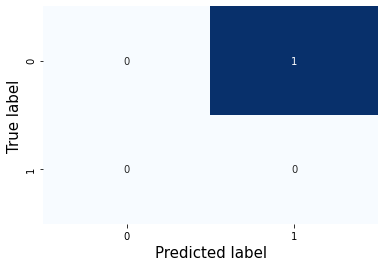

In [19]:
y = [weekly_df.Direction_Up.iloc[0]]
y_pred = log_r.predict([weekly_df[['Lag1', 'Lag2']].iloc[0]])

test_err = 1 - sum(sum([y == y_pred]))/len(y)
print("test error rate =", round(test_err*100, 4),"%")

# confusion matrix
confusion_mtx = confusion_matrix(y, y_pred)
plot_confusion_matrix(confusion_mtx)

<a id='7d'></a>
**$(d)$ Write a for loop from $i = 1$ to $i = n$, where $n$ is the number of observations in the data set, that performs each of the following steps:**

- **$i.$ Fit a logistic regression model using all but the $i$th observation to predict $\color{brown}{\text{Direction}}$ using $\color{brown}{\text{Lag1}}$ and $\color{brown}{\text{Lag2}}$.**

- **$ii.$ Compute the posterior probability of the market moving up for the ith observation.**

- **$iii.$ Use the posterior probability for the $i$th observation in order to predict whether or not the market moves up.**

- **$iv.$ Determine whether or not an error was made in predicting the direction for the $i$th observation. If an error was made,then indicate this as a 1, and otherwise indicate it as a 0.**

In [20]:
y_pred = []

for i in range(len(weekly_df)):
    
    idx = weekly_df.index[weekly_df.index != i]
    
    X_train = weekly_df[['Lag1', 'Lag2']].iloc[idx, :]
    X_test  = [weekly_df[['Lag1', 'Lag2']].iloc[i, :]]
    
    y_train = weekly_df.Direction_Up.iloc[idx]
    y_test  = [weekly_df.Direction_Up.iloc[i]]
    
    # Model
    log_r = LogisticRegression().fit(X_train, y_train)
    
    # Predict
    y_pred.append(log_r.predict(X_test)[0])

<a id='7e'></a>
**$(e)$ Take the average of the $n$ numbers obtained in $(d)iv$ in order to obtain the LOOCV estimate for the test error. Comment on the results.**

In [21]:
X_test

[Lag1    1.034
 Lag2    0.283
 Name: 1088, dtype: float64]

test error rate = 44.9954 %


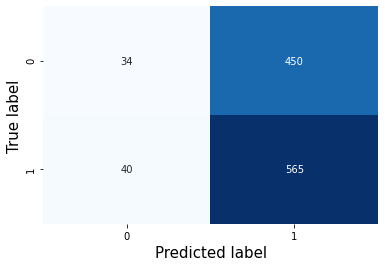

In [22]:
y_test = np.array(weekly_df.Direction_Up)

test_err = 1 - sum(y_test == y_pred)/len(y_pred)
print("test error rate =", round(test_err*100, 4),"%")

# confusion matrix
confusion_mtx = confusion_matrix(y_test, np.array(y_pred))
plot_confusion_matrix(confusion_mtx)

>- **Comments:**
>  - `LOOCV` produces a test error rate of $45.0\%$, higher than the $43.67\%$ error rate observed with a $50\%$ holdout set.
>  - Still our classifier is not that much good.
>  - However, The `LOOCV` approach allows the model to train on a $n - 1$ observations larger than 50% holdout which train on $n/2$, which could be significant if we were to experiment with more flexible models that require more observations to mitigate over-fitting. 

<a id='8'></a>
### $8.$ We will now perform cross-validation on a simulated data set.

<a id='8a'></a>
**$(a)$ Generate a simulated data set as follows:**

```
> set .seed (1)
> y=rnorm (100)
> x=rnorm (100)
> y=x-2* x^2+ rnorm (100)
```

**In this data set, what is $n$ and what is $p$? Write out the model used to generate the data in equation form.**

In [23]:
np.random.seed(1)
x = np.random.normal(size=100)
y = x - (2*x**2) + np.random.normal(size=100)

>- $n = 100$
>- $p = 2$
>- $Y = X - 2 X^2 + \epsilon$.

<a id='8b'></a>
**$(b)$ Create a scatterplot of $X$ against $Y$ . Comment on what you find.**

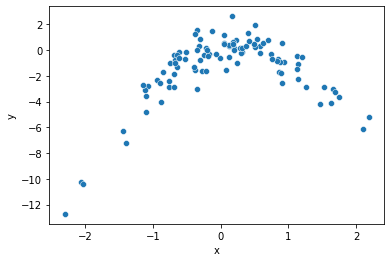

In [24]:
ax = sns.scatterplot(x=x, y=y)
plt.xlabel('x')
plt.ylabel('y');

>- The above graph shows $X$ plotted against $Y$.
>- From the above graph, it is clear that there is a linear relationship between $X$ and $Y$ from the shape of the curve with some variance.
>- The scope of the graph has 2 maximum and -2 minimum with a quadratic shape.

<a id='8c'></a>
**$(c)$ Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:**

- $i.$   $Y = \beta_0 + \beta_1 X + \epsilon$  
- $ii.$ $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon$  
- $iii.$ $Y = \beta_0 + β_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$  
- $iv.$ $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \beta_4 X^4 + \epsilon$  

**Note you may find it helpful to use the $\color{brown}{\text{data.frame()}}$ function to create a single data set containing both $X$ and $Y$ .**

In [25]:
def mse(y_true, y_pred):
    """Calculate mean squared error"""
    return np.sum(np.square(y_pred - y_true)) / y_true.size

np.random.seed(1)
x = np.random.normal(size=100)
y = x - (2*x**2) + np.random.normal(size=100)
df = pd.DataFrame({'x': x, 'y': y})

formulae = {'x'   : 'y ~ x', 
            'x^2' : 'y ~ x + np.power(x, 2)',
            'x^3' : 'y ~ x + np.power(x, 2) + np.power(x, 3)',
            'x^4' : 'y ~ x + np.power(x, 2) + np.power(x, 3) + np.power(x, 4)'}

errors = {}
for f in formulae:
    # predictions state
    y_pred = []
    
    for i in range(df.shape[0]):

        # Model
        train = df.drop(i)
        l_r = smf.ols(formula=formulae[f], data=df.drop(i)).fit()

        ## Predict
        y_pred  += [float(l_r.predict(exog=dict(x=df.iloc[i]['x'])))]
    errors[f] = mse(y, np.array(y_pred))
errors

{'x': 6.260764331604616,
 'x^2': 0.9142897072803663,
 'x^3': 0.92687687816488,
 'x^4': 0.8669116865881079}

<a id='8d'></a>
**$(d)$ Repeat $(c)$ using another random seed, and report your results.
Are your results the same as what you got in $(c)$? Why?**

In [26]:
np.random.seed(2)
x = np.random.normal(size=100)
y = x - (2*x**2) + np.random.normal(size=100)
df = pd.DataFrame({'x': x, 'y': y})

formulae = {'x'   : 'y ~ x', 
            'x^2' : 'y ~ x + np.power(x, 2)',
            'x^3' : 'y ~ x + np.power(x, 2) + np.power(x, 3)',
            'x^4' : 'y ~ x + np.power(x, 2) + np.power(x, 3) + np.power(x, 4)'}

errors = {}
for f in formulae:
    # predictions state
    y_pred = []
    
    for i in range(df.shape[0]):

        # Model
        train = df.drop(i)
        l_r = smf.ols(formula=formulae[f], data=df.drop(i)).fit()

        ## Predict
        y_pred  += [float(l_r.predict(exog=dict(x=df.iloc[i]['x'])))]
    errors[f] = mse(y, np.array(y_pred))
errors

{'x': 11.610208269693626,
 'x^2': 1.2652839413336217,
 'x^3': 1.2820418215169607,
 'x^4': 1.3165915804276822}

>- Changing the random seed that is used to simulate the observations has a large effect on the observed mean squared error.
>- In changing the random seed we have changed the sample of observations taken from the population.
>- This change in error is due to the small sample size with $n=100$, and so high variance in our data.

<a id='8e'></a>
**$(e)$ Which of the models in $(c)$ had the smallest LOOCV error? Is this what you expected? Explain your answer.**

>- The $iv.$ model has the smallest LOOCV error.
>- Although the second, third and fourth order polynomial fits perform almost identically.
>- This is as we would expect, as the more flexible models "higher-order polynomials" tend to overfit the training set, and as the relationship between $X$ and $Y$ in $(a)$ already quadratic.

<a id='8f'></a>
**$(f)$ Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in $(c)$ using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?**

In [27]:
np.random.seed(1)
x = np.random.normal(size=100)
y = x - (2*x**2) + np.random.normal(size=100)
df = pd.DataFrame({'x': x, 'y': y})

formula = {'x'    : 'y ~ x', 
            'x^2' : 'y ~ x + np.power(x, 2)',
            'x^3' : 'y ~ x + np.power(x, 2) + np.power(x, 3)',
            'x^4' : 'y ~ x + np.power(x, 2) + np.power(x, 3) + np.power(x, 4)'}

p_values = {}
for f in formulae:
    p_val = [0]
    for i in range(df.shape[0]):

        # Model
        train = df.drop(i)
        l_r = smf.ols(formula=formula[f], data=df.drop(i)).fit()

        ## p-values
        try:
            p_val += l_r.pvalues
        except:
            p_val = l_r.pvalues

    p_values[f] = round(p_val/100, 5)

In [28]:
for k, v in p_values.items():
    print(k)
    print(v)
    print("-------------------------")

x
Intercept    0.00000
x            0.00277
dtype: float64
-------------------------
x^2
Intercept         0.24966
x                 0.00000
np.power(x, 2)    0.00000
dtype: float64
-------------------------
x^3
Intercept         0.27376
x                 0.00001
np.power(x, 2)    0.00000
np.power(x, 3)    0.23250
dtype: float64
-------------------------
x^4
Intercept         0.02446
x                 0.00000
np.power(x, 2)    0.00000
np.power(x, 3)    0.12781
np.power(x, 4)    0.01814
dtype: float64
-------------------------


>- The $\text{p-value}$ in $i.$ with $x$ as the only predictor, seems to be statistical significance with a $\text{p-value}$ under our threshold of $0.05$.
>- In $ii.$ with the quadratic term, still statistical significance.
>- In $iii.$ the quadratic term still statistical significance, but still there's no evidence that the cubic term is not a statistical significance, which concluded that there's no reason to add the cubic term in the model.
>- in $iv.$ the quadratic and the Quartic terms are statistical significance, but still there's no evidence that the cubic term is statistical significance.

<a id='9'></a>
### $9.$ We will now consider the $\color{brown}{\text{Boston}}$ housing data set, from the $\color{brown}{\text{MASS}}$ library.

In [29]:
# read boston dataset 
boston_df = pd.read_csv('datasets/Boston.csv').drop('Unnamed: 0', axis=1)
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<a id='9a'></a>
**$(a)$ Based on this data set, provide an estimate for the population mean of $\color{brown}{\text{medv}}$. Call this estimate $\hat{\mu}$.**

In [30]:
mu_hat = boston_df.medv.mean()
mu_hat

22.532806324110677

# Here!

<a id='9b'></a>
**$(b)$ Provide an estimate of the standard error of $\hat{\mu}$. Interpret this result.**

***Hint: We can compute the standard error of the sample mean by dividing the sample standard deviation by the square root of the number of observations.***

In [31]:
se = np.std(boston_df.medv) / np.sqrt(len(boston_df))
se

0.4084569346972866

<a id='9c'></a>
**$(c)$ Now estimate the standard error of $\hat{\mu}$ using the bootstrap. How does this compare to your answer from $(b)$?**

In [32]:
st_err = []
n = 2000

for i in range(n):
    # bootstrap sample
    sample = boston_df.medv.sample(len(boston_df), replace=True)
    
    # standard error of u^
    s_err = np.std(sample) / np.sqrt(len(boston_df))
    st_err.append(s_err)

boot_se = np.mean(st_err)
boot_se

0.40753503932908874

>- The bootstrap method gives a approximately similar $SE$ as the answer from $(b)$, and that's a remarkably good estimate of the standard error, when compared to the same estimate derived analytically in $(b)$.
>- The bootstrap approach is computationally more expensive, but has the advantage that no analytic derivation of the standard error for the statistic is required, making it much more general for application to other statistics.

<a id='9d'></a>
**$(d)$ Based on your bootstrap estimate from $(c)$, provide a $95\%$ confidence interval for the mean of $\color{brown}{\text{medv}}$. Compare it to the results obtained using $\color{brown}{\text{t.test(Boston\$medv)}}$. Hint: You can approximate a $95\%$ confidence interval using the formula $[\hat{\mu} - 2SE(\hat{\mu}), \hat{\mu} + 2SE(\hat{\mu})]$.**

In [33]:
mu_hat = round(np.mean(boston_df.medv), 6)
conf_l = round(mu_hat - (2*boot_se), 6)
conf_h = round(mu_hat + (2*boot_se), 6)

print('mu^:', mu_hat)
print('SE: ', round(boot_se, 6))
print(f'95% confidence interval: [{conf_l}, {conf_h}]')

mu^: 22.532806
SE:  0.407535
95% confidence interval: [21.717736, 23.347876]


<a id='9e'></a>
**$(e)$ Based on this data set, provide an estimate, ${\hat{\mu}_{med}}$, for the median value of $\color{brown}{\text{medv}}$ in the population.**

In [34]:
median_hat = np.median(boston_df['medv'])
median_hat

21.2

<a id='9f'></a>
**$(f)$ We now would like to estimate the standard error of ${\hat{\mu}_{med}}$. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.**

In [35]:
medians = []
n = 2000

for i in range(n):
    # bootstrap sample
    sample = boston_df.medv.sample(len(boston_df), replace=True)
    
    # the sample median
    median = np.median(sample)
    medians.append(median)

med_se = np.std(medians)
med_se

0.37113447360761265

>- As with the mean, the standard error is quite small relative to the median value.

<a id='9g'></a>
**$(g)$ Based on this data set, provide an estimate for the tenth percentile of $\color{brown}{\text{medv}}$ in Boston suburbs. Call this quantity $\hat{\mu}_{0.1}$. (You can use the $\color{brown}{\text{quantile()}}$ function.)**

In [36]:
ten_perc = np.percentile(boston_df.medv, 10)
ten_perc

12.75

<a id='9h'></a>
**$(h)$ Use the bootstrap to estimate the standard error of $\hat{\mu}_{0.1}$. Comment on your findings.**

In [37]:
ten_percs = []
n = 2000

for i in range(n):
    # bootstrap sample
    sample = boston_df.medv.sample(len(boston_df), replace=True)
    
    # tenth percentile
    ten_perc = np.percentile(sample, 10)
    ten_percs.append(ten_perc)

ten_perc_se = np.std(ten_percs)
ten_perc_se

0.5037729548119867

>- The standard error is slightly larger relative to $\hat{\mu}_{0.1}$, but it is still small relative to the tenth percentile value.

# Done!